### Divide and Conquer algorithms

In this notebook we will code and analyse the following three divide and conquer algorithms.

1. Counting the number of inversions
2. Matrix multiplication using Strassen's algorithm
3. Computing the closest points together.


#### Counting the Number of inversions

Counting the number of inversions is a measure of how similar (or not similar) are two arrays of numbers. This algorithm is used in recommender systems where the system recommends something (say a movie) to the consumer based on how similar their rating is to other people who rated similarly.

Collaborative Filtering is a technique where we try to find similarities between likes of people. Suppose we want to find similarities of the movie rankings of two people, we will sort movies by ranking of one person's preference and then put ranks given by the second person for those movies. 

For example if your ranked 3 movies A, B and C as your favorite movies and your friend ranked their favorite movies as B A C then between you and the your friend the ranking list becomes 2 1 3 because A is your favorite movie but is second favorite for B. Similarly B is your second favorite movie but your friend's favorite. Both you and your friend's choice match for the third best movie.

From the above example we see that if two people have similar tastes, both the arrays would be identical and there would be no inversions. Higher the number of inversions more are the differences in the preferences.

We will use divide and conquer algorithm like Merge sort to find the number of inversions in an array. The number of inversions in an array A are the number of pairs of indices $(i, j)$ where $i < j$ and $A[i] < A[j]$

An array that is sorted has no inversions, the converse is also true, that is, an array with no inversions is sorted and is not sorted if it has atleast one inversion.

For example, consider the following array

1 3 5 2 4 6

The number of inversions in this array are the following pair of numbers
(3, 2), (5, 2) and (5, 4)

For an array of n numbers, we can have a maxumum of (n - 1) + (n - 2) + .. + 1 number of inversions = $n(n - 1) / 2$ number of inversions.


Let us implement ``counting inversion`` in two different ways. First one is the Bruteforce approach and the second one is using divide and conquer approach that sorts the numbers using Merge Sort along with counting the number of inversions.



In [1]:
def count_inv_brute_force(array):
    num_inversions = 0
    for i in range(len(array)):
        for j in range(i + 1, len(array)):
            if array[i] > array[j]:
                num_inversions += 1
            
    return num_inversions
                

In [2]:
count_inv_brute_force([1, 3, 5, 2, 4, 6])

3

we will now load the two test case files provided [here](http://theory.stanford.edu/~tim/algorithmsilluminated.html) and test our implementation. 

In [5]:
with open('problem3.5test.txt', 'r') as f:
    lines = f.readlines()
prob35test = [int(line.strip()) for line in lines]

with open('problem3.5.txt', 'r') as f:
    lines = f.readlines()
prob35 = [int(line.strip()) for line in lines]


In [7]:
count_inv_brute_force(prob35test)

28


The brute force approach seems to be working fine for small inputs, it will however not work for efficiently on the larger 100000 numbers for counting the inversions. We will now implement the inversion counting piggy backed on merge sort 

In [35]:
def count_inversions_and_sort(array1, array2):
    #
    # Returns a tuple of the number inversions and the sorted array
    #
    res = []
    num_inv = 0
    i = 0
    j = 0
    l1 = len(array1)
    l2 = len(array2)
    for _ in range(l1 + l2):
        if i == l1:
            res += [array2[x] for x in range(j, l2)]
            break
        if j == l2:
            res += [array1[x] for x in range(i, l1)]
            break
            
        if array1[i] < array2[j]:
            res.append(array1[i])
            i += 1
        else:
            res.append(array2[j])
            j += 1
            #If array1[i] is less than array2[j] then all remaining elements of
            #array1 also are guaranteed to be larger than array2[j] since both array1 and array2 
            #are sorted. Thus the number of elements in array1 (including the current) will have split inversions
            #with the current element in array2            
            num_inv += (l1 - i)
            
    return (num_inv, res)
    

In [29]:
def sort_and_count_inversions(array):
    if len(array) == 1:
        return (0, array)
    
    i = len(array) // 2
    l_inv, left = sort_and_count_inversions(array[0:i])
    r_inv, right = sort_and_count_inversions(array[i:])
    split_inv, merged = count_inversions_and_sort(left, right)
    return (l_inv + r_inv + split_inv, merged)

In [34]:
splits, _ = sort_and_count_inversions(prob35test)
print('Number of splits in test array are',splits)

splits, _ = sort_and_count_inversions(prob35)
print('Number of splits in the big array are',splits)


Number of splits in test array are 28
Number of splits in the big array are 2407905288




The divide and conquer method ``sort_and_count_inversions`` is trivial. All we do is to count the number of inversions on the left and right and get the corresponding halves sorted. We then find the split inversions and also merge the two sorted arrays. The total inversions are the number of inversions on the left plus the ones on the right plus the number of split inversions.

The ingenuity lies in the ``count_inversions_and_sort`` function. This function piggy backs on the merge sort function and counts the number of inversions along with sorting the array. The function defined above is pretty straight forward and has comments inline giving explanation.

If we have no inversions in a array A and we receive two halves of an array, then the elements in first half are strictly less than the elements in second half.

The ``sort_and_count_inversions`` splits the input array in two and recursively sorts and counts inversions on the left and right half. The number of tasks at level n doubles than that of level n - 1 and input size given to each of task at level n is half of the input given to a unit on n - 1 level. This is similar to merge sort and given that the routine to sort and count inversions execute in linear time, the count ``sort_and_count_inversions`` also runs in $O(nlogn)$ time

---
#### Strassen's Matrix multiplication Algorithm

Stratten's Matrix multiplication algorithm is a clever divide and conquer approach for multiplying two matrix. Before we see the details of matrix multiplication using Strassen's approach, let us implement matrix multiplication using simple, straight forward approach.

For simplicity of implementing divide and conquer algorithms, we will assume that the matrix square and each side is a power of 2.

In [236]:
def mult_simple(A, B):
    dim = len(A[0])
    Z = [[0 for _ in range(dim)] for _ in range(dim)]
    for i in range(dim):
        for j in range(dim):
            Z[i][j] = sum([A[i][k] * B[k][j] for k in range(dim)])
                
    return Z                

In [237]:
mult_simple([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12], [13, 14, 15, 16]], 
                  [[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12], [13, 14, 15, 16]])

[[90, 100, 110, 120],
 [202, 228, 254, 280],
 [314, 356, 398, 440],
 [426, 484, 542, 600]]



Since there are three loops in the above multiplication (with variables i, j and k for each loop counter). The time complexity of a matrix multiplication is $O(n^3)$.

Before we go ahead and implement a recursive divide and conquer algorithm, let us verify our result are correct by using a reference implementation.

In [238]:
import numpy as np
A = np.matrix([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12], [13, 14, 15, 16]])
A * A

matrix([[ 90, 100, 110, 120],
        [202, 228, 254, 280],
        [314, 356, 398, 440],
        [426, 484, 542, 600]])


The divide and conquer approach will break split an $n \times n$ matrix into 4 $\frac{n}{2} \times \frac{n}{2}$ matrix and then multiple then recursively. Let us illustrate then as below

Suppose the bigger matrix X and Y are split in the following two matrices. Then the resulting matrix multiplication is formed by multiplying and these 8 small matrices. This divide and conquer can continue until we get a matrix of size 1 where the recursive divide and conquer stops. This divide and conquer is summarized in the following picture where A, B, C, D and E, F, G, H are smaller matrices of the bigger matrices X and Y respectively.

$$
\begin{pmatrix} 
A & B \\
C & D 
\end{pmatrix}
\times
\begin{pmatrix} 
E & F \\
G & H 
\end{pmatrix}
=
\begin{pmatrix} 
AE + BG  & AF + BH \\
CE + DG & CF + DH 
\end{pmatrix}
$$




In [246]:
def add_matrices(A, B):
    if type(A[0]) is int:
        return [A[i] + B[i] for i in range(len(A))]
    else:
        dim = len(A[0])
        return [[A[i][j] + B[i][j] for j in range(dim)] for i in range(dim)]
    
def sub_matrices(A, B):
    if type(A[0]) is int:
        return [A[i] - B[i] for i in range(len(A))]
    else:
        dim = len(A[0])
        return [[A[i][j] - B[i][j] for j in range(dim)] for i in range(dim)]


def slicemat(mat, r_from, r_to, c_from, c_to):
    return [[mat[r][c] for c in range(c_from, c_to)] for r in range(r_from, r_to)]

def hcat(A, B):
    return [A[0] + B[0]] if len(A) == 1 else [A[r] + B[r] for r in range(len(A))]


def mult_dc(X, Y):
    dim = len(X[0])
    if dim == 1:
        return [[X[0][0] * Y[0][0]]]
    else:
        A = slicemat(X, 0, dim // 2, 0, dim // 2)
        B = slicemat(X, 0, dim // 2, dim // 2, dim)
        C = slicemat(X, dim // 2, dim, 0, dim // 2)
        D = slicemat(X, dim // 2, dim, dim // 2, dim)
        E = slicemat(Y, 0, dim // 2, 0, dim // 2)
        F = slicemat(Y, 0, dim // 2, dim // 2, dim)
        G = slicemat(Y, dim // 2, dim, 0, dim // 2)
        H = slicemat(Y, dim // 2, dim, dim // 2, dim)
        AE = mult_dc(A, E)
        BG = mult_dc(B, G)
        AF = mult_dc(A, F)
        BH = mult_dc(B, H)
        CE = mult_dc(C, E)
        DG = mult_dc(D, G)
        CF = mult_dc(C, F)
        DH = mult_dc(D, H)
        return hcat(add_matrices(AE, BG), add_matrices(AF, BH)) + hcat(add_matrices(CE, DG), add_matrices(CF, DH))
        

In [242]:
X = [[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12], [13, 14, 15, 16]]
mult_dc(X, X)

[[90, 100, 110, 120],
 [202, 228, 254, 280],
 [314, 356, 398, 440],
 [426, 484, 542, 600]]


The scary looking function shown above is implementation of the same algorithm described earlier. We split the input array into 8 smaller arrays and perform these 8 matrix multiplication recursively before we combine the results into a bigger martix. Without looking at how we compute the time compexity of the algorithm it still is $O(n^3)$, no different than the simple approach tried earlier. The derivation of this time complexity will be done later when we study the Master method.

The recursive approach above looks similar to the divide and conquer approach we saw for multiplication of two numbers. A clever trick used in Karatsuba multiplication reduced the number of recursive calls thus reducing the time complexity below $n^2$. Can we do something similar? The Strassen's approach reduces the recursive calls from 8 to 7 thus making the algorithm more efficient. How these 7 multiplications to be performed were discovered are not known and are as follows.


$$
P_1 = A\cdot (F - H)\\ 
P_2 = (A + B)\cdot H\\
P_3 = (C + D)\cdot E\\
P_4 = D\cdot (G - E)\\
P_5 = (A + D)\cdot (E + H)\\
P_6 = (B - D)\cdot (G + H)\\
P_7 = (A - C)\cdot (E + F)\\
$$

$$
X\cdot T = 
\begin{pmatrix} 
A & B \\
C & D 
\end{pmatrix}
\times
\begin{pmatrix} 
E & F \\
G & H 
\end{pmatrix}
=
\begin{pmatrix} 
AE + BG  & AF + BH \\
CE + DG & CF + DH 
\end{pmatrix}
=
\begin{pmatrix}
P_5 + P_4 - P_2 + P_6 & P_1 + P_2\\
P_3 + P_4 & P_1 + P_5 - P_3 - P_7
\end{pmatrix}
$$

Following code snippet is an implementation of strassen's matrix multiplication 

In [247]:
def mult_strassen(X, Y):
    dim = len(X[0])
    if dim == 1:
        return [[X[0][0] * Y[0][0]]]
    else:
        A = slicemat(X, 0, dim // 2, 0, dim // 2)
        B = slicemat(X, 0, dim // 2, dim // 2, dim)
        C = slicemat(X, dim // 2, dim, 0, dim // 2)
        D = slicemat(X, dim // 2, dim, dim // 2, dim)
        E = slicemat(Y, 0, dim // 2, 0, dim // 2)
        F = slicemat(Y, 0, dim // 2, dim // 2, dim)
        G = slicemat(Y, dim // 2, dim, 0, dim // 2)
        H = slicemat(Y, dim // 2, dim, dim // 2, dim)
        P1 = mult_dc(A, sub_matrices(F, H))
        P2 = mult_dc(add_matrices(A, B), H)
        P3 = mult_dc(add_matrices(C, D), E)
        P4 = mult_dc(D, sub_matrices(G, E))
        P5 = mult_dc(add_matrices(A, D), add_matrices(E, H))
        P6 = mult_dc(sub_matrices(B, D), add_matrices(G, H))
        P7 = mult_dc(sub_matrices(A, C), add_matrices(E, F))
        return hcat(
            add_matrices(sub_matrices(add_matrices(P5, P4), P2), P6), 
            add_matrices(P1, P2)) +  hcat(add_matrices(P3, P4), sub_matrices(add_matrices(P1, P5), add_matrices(P3, P7)))

In [248]:
X = [[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12], [13, 14, 15, 16]]
mult_strassen(X, X)

[[90, 100, 110, 120],
 [202, 228, 254, 280],
 [314, 356, 398, 440],
 [426, 484, 542, 600]]


The time complexity analysis of Strassen's method will be done later when we explore the Master method later.


#### Find the closest pair

The final divide and conquer algorithm would be to find the closest pairs in $O(nlogn)$ time. For the problem we are given n points in a plane and the goal is to find two points with minimum euclidean distance between them.

For two points $p_1 = (x_1, y_1)$ and $p_2 = (x_2, y_2)$ the euclidean distance $d(p_1, p_2)$ can be found using $\sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2}$

Starting with the Brute force approach, we know that the Naive algorithm will compute the distance of all points with all other points and then finds two with minimum distance between them. This algorithm has a time complexity of $O(n^2)$. Quadratic time is certainly not the best algorithm in this case and we should be looking at something better.

Let us start with points in 1 dimension. The naive approach still gives us the closest points in 1-D in $O(n^2)$ time. However, just by sorting these points in $O(nlogn)$ time using something like Merge Sort and then doing a linear scan in linear time to find the a pair of points closest to each other is easily achievable. Thus we have a better algorithm than in 1-D then quadratic time to find the closest pair.

Let us now see how to find the closest points in 2-D. Let us consider the following points, (0, 0), (1, 1), (0.5, 4), (4, 0.5) and (-2, 2) and plot them to get a visual on them

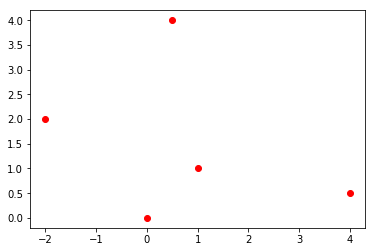

In [261]:
import matplotlib.pyplot as plt

points = [(0, 0), (1, 1), (0.5, 4), (4, 0.5), (-2, 2)] 
plt.plot([x[0] for x in points], [x[1] for x in points], 'ro')
plt.show()


Visually the points (0, 0) and (1, 1) appear to be closest. Just like in case of 1-D let us sort these points by x axis and then by y axis. Thus we get a couple of copies of the original array.

In [266]:
px = sorted(points, key = lambda x: x[0])
py = sorted(points, key = lambda x: x[1])
print('px:', px, 'py:', py)

px: [(-2, 2), (0, 0), (0.5, 4), (1, 1), (4, 0.5)] py: [(0, 0), (4, 0.5), (1, 1), (-2, 2), (0.5, 4)]



From the above output, we see that the in px and py, the points sorted by x and y corrdinates, the closest pair of points (0, 0) and (1, 1) do not appear consecutively.

Our divide and conquer algorithm in 2-D space essetntally does the following

1. Define a function ``ClosestPair`` that accepts two inputs, $p_x$ and $p_y$, the points sorted by x and y coordinates respectively.
2. Define the following four arrays
  - $l_x$: The Left half of $p_x$
  - $r_x$: The Right half of $p_x$
  - $l_y$: The Left half of $p_x$, sorted by their occurance in $p_y$
  - $r_y$: The Right half of $p_x$, sorted by their occurance in $p_y$
3. Recursively call ``ClosestPair`` twice by passing $l_x, l_y$ and $r_x, r_y$ to find two pair of points $(l_1, l_2)$ and $(r_1,r_2)$, the closest points on the left and right half respectively.
4. We then implement a fuction to find the closes points split in left and right. This is the most challenging bit which we will see later. This function called ``ClosestSplitPair`` returns the pair of points closest to each other but split in left and right halves. We call these points $(s_1, s_2)$
5. Return the closest from these three pair of points $(l_1, l_2), (r_1, r_2), (s_1, s_2)$

Now assuming that we implement the function ``CloseseSplitPair`` (point 4 above) in linear time, we can implement this entire algorithm in $O(nlogn)$ time as the analysis is very similar to the analysis of Merge sort where we split the input in two and make two recursive calls. Then perform linear work outside the recursive calls.